<table style="width: 100%; margin-left: auto; margin-right: auto;" border="0">
    <tr>
        <td rowspan="3"> <img src="brasao_ufrn.png" width="150"/> </td>
        <td style="text-align: center">  Escola de Ciências e Tecnologia </td>
        <td rowspan="3" style="text-align: center"> UFRN<br> CT<br> PPGEMECA </td>
    </tr>
    <tr>
        <td style="text-align: center"> PPGEMECA - Percepção Robótica </td>
    </tr>
    <tr>
        <td>
            <p style="text-align: left;">Prof. Bruno Silva<br>
                                         Prof. Marcelo Nogueira</p>
        </td>
    </tr>
</table>

## Features Multi Escala - Intuição I

Segundo o detector de cantos (*corners*) da aula anterior, em quais das imagens abaixo
será detectado um canto no centro do filtro (janela $3 \times 3$ em destaque)?

<table border="0">
<tr>
<td><img src="23_features_multi_escala/ponto_multi_escala1.png" style="margin:auto; width: 200px;"/></td>
<td><img src="23_features_multi_escala/ponto_multi_escala2.png" style="margin:auto; width: 200px;"/></td>
<td><img src="23_features_multi_escala/ponto_multi_escala3.png" style="margin:auto; width: 200px;"/></td>
</tr>
</table>

## Features Multi Escala - Intuição II

E caso seja utilizada uma janela $5 \times 5$? No que isto influencia?
Em quais das imagens abaixo será detectado um canto no centro do filtro?

<table border="0">
<tr>
<td><img src="23_features_multi_escala/ponto_multi_escala4.png" style="margin:auto; width: 200px;"/></td>
<td><img src="23_features_multi_escala/ponto_multi_escala5.png" style="margin:auto; width: 200px;"/></td>
<td><img src="23_features_multi_escala/ponto_multi_escala6.png" style="margin:auto; width: 200px;"/></td>
</tr>
</table>

## Features Multi Escala - Intuição III

- Observe que uma região só é classificada como ponto de acordo com a matriz de autocorrelação dos gradientes (matriz $C$ da aula passada) calculada no centro do filtro
    - Ou seja, existem cenários em que, para uma janela pequena (ex: $3 \times 3$), os autovalores de $C$ sejam pequenos
      mas com uma janela maior na mesma posição (ex: $5 \times 5$), os autovalores de $C$ sejam grandes
- Em outras palavras: a resposta do detector de cantos depende do *tamanho relativo* do filtro em relação ao padrão de intensidade da imagem
- Intuitivamente: caso uma região seja uniforme para um tamanho de filtro, é possível:
    - Aumentar o tamanho do filtro **ou**
    - Aumentar o tamanho da imagem, mantendo o tamanho do filtro constante
        

## Features Multi Escala - Intuição IV

A intuição apresentada anteriormente é explorada nos *detectores de pontos multi escala*:

- SIFT (*Scale Invariant Feature Transform*)
    - Algoritmo mais conhecido que detecta este tipo de feature
    - **Objeto de estudo desta aula**
- SURF (*Speeded-Up Robust Features*)
- BRIEF (*Binary Robust Independent Elementary Features*)
- ORB (*Oriented* BRIEF)
- FREAK (*Fast Retina Keypoint*)
- etc.

## Espaço de Escalas I

Formalmente, features invariantes à escala são detectadas
segundo a teoria de **Espaço de Escalas**:

- Teoria formalizada nos anos 1980
- Fundamentada na área de Processamento de Sinais
- Estuda a matemática necessária para representar um
  sinal invariante à escala

## Espaço de Escalas II

Para gerar o espaço de escala $L(x,y,\sigma)$ de uma imagem $I(x,y)$,
é preciso realizar a sua convolução com o kernel Gaussiano
$G(x,y,\sigma)$:

$$
L(x,y,\sigma) = G(x,y,\sigma) * I(x,y),
$$

## Espaço de Escalas IV

Os valores de $\sigma$ utilizados para gerar o espaço de escalas:

- Determinam o grau de borramento da imagem $I(x,y)$
- São considerados escalas
- São escolhidos de forma fundamentada na teoria
    - $\sigma$ é um valor contínuo e portanto, admite infinitos valores

## Espaço de Escalas V

O primeiro passo para gerar o espaço de escalas de uma imagem
é construir uma **pirâmide de Gaussianas** da imagem de entrada:

- Cada nível $l$ da pirâmide é construído com:
    - A imagem de entrada é o nível $0$ da pirâmide
    - O descarte de linha sim/linha não coluna sim/coluna não da imagem do nível anterior
    - O borramento da imagem utilizando um determinado valor para $\sigma$

## Espaço de Escalas VI

As funções da OpenCV `pyrDown` e `pyrUp`
implementam o redimensionamento e borramento
com Gaussiano necessários para construção
da pirâmide.

O código a seguir exibe como construir uma pirâmide de Gaussianas
(primeiro passo para a geração do espaço de escalas)

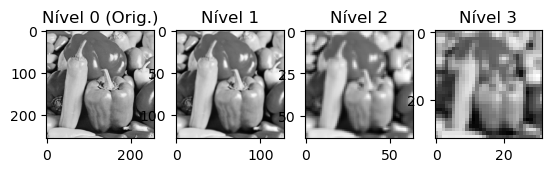

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_name = 'samples/peppers.png'
img_orig = cv2.imread(img_name)

# gera pirâmide Gaussiana com 4 níveis
gaus_pyr = []
gaus_pyr.append(cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY))
for l in range(3):
    gaus_pyr.append(cv2.pyrDown(gaus_pyr[l]))

# IMPORTANTE: as imagens estão redimensionadas para exibição
plt.subplot(141)
plt.gca().set_title('Nível 0 (Orig.)')
plt.imshow(gaus_pyr[0], cmap='gray')
plt.subplot(142)
plt.gca().set_title('Nível 1')
plt.imshow(gaus_pyr[1], cmap='gray')
plt.subplot(143)
plt.gca().set_title('Nível 2')
plt.imshow(gaus_pyr[2], cmap='gray')
plt.subplot(144)
plt.gca().set_title('Nível 3')
plt.imshow(gaus_pyr[3], cmap='gray')
plt.show()

## Espaço de Escalas VII

Uma pirâmide denominada **pirâmide de Laplacianos**
forma a base para gerar o espaço de escala de uma imagem.

A pirâmide de Laplacianos pode ser computada
então a partir da pirâmide Gaussianas, de acordo
com a lógica na figura abaixo.

<img src="23_features_multi_escala/piramide_imagem.png" width="700"/>

Observe o código para gerar a pirâmide de Laplacianos no código a seguir.

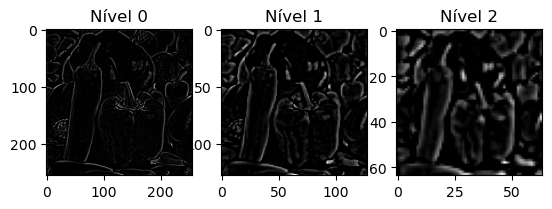

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_name = 'samples/peppers.png'
img_orig = cv2.imread(img_name)

# gera pirâmide Gaussiana com 4 níveis
gaus_pyr = []
gaus_pyr.append(cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY))
for i in range(3):
    gaus_pyr.append(cv2.pyrDown(gaus_pyr[i]))

# gera pirâmide Laplaciana (Diferença de Gaussiana) com 3 níveis
lapl_pyr = []
for i in range(1,4):
    lapl_pyr.append(cv2.subtract(gaus_pyr[i-1], cv2.pyrUp(gaus_pyr[i])))

plt.subplot(131)
plt.gca().set_title('Nível 0')
plt.imshow(lapl_pyr[0], cmap='gray')
plt.subplot(132)
plt.gca().set_title('Nível 1')
plt.imshow(lapl_pyr[1], cmap='gray')
plt.subplot(133)
plt.gca().set_title('Nível 2')
plt.imshow(lapl_pyr[2], cmap='gray')
plt.show()

## Espaço de Escalas VIII

- Cada nível $l$ da pirâmide de Gaussianas é denominado
de **oitava** (*octave*)

- Para cada oitava, realiza-se a convolução da imagem
base do nível com kernels $G(x,y,\sigma)$ com diferentes
valores de $\sigma$

- As imagens resultantes formam "subníveis" na pirâmide
de Gaussianas

- Ao computar diferenças entre imagens de subníveis
  adjacentes na pirâmide Gaussiana, obtém-se
  o espaço de escalas

## Espaço de Escalas IX

A imagem a seguir exibe a pirâmide de Gaussianas e o espaço
de escalas computado por diferenças de Gaussianas (DoG).

<table border="0">
<tr><td><img src="23_features_multi_escala/lowe_oitavas.png" style="margin:auto; width: 600px;"/></td></tr>
<tr><td>Imagem de [3]</td></tr>
</table>

## Detecção de Pontos SIFT I

Features SIFT são então detectadas no espaço de escalas:

- **Extremos** (mínimos ou máximos) devem ser detectados ao longo de sua vizinhança espacial **e** ao longo de escalas
- Similar a como é feito com a detecção de cantos

A imagem a seguir exibe a vizinhança a ser checada para confirmar se o ponto é um extremo

<table border="0">
<tr><td><img src="23_features_multi_escala/lowe_extremos.png" style="margin:auto; width: 350px;"/></td></tr>
<tr><td>Imagem de [3]</td></tr>
</table>

## Detecção de Pontos SIFT II

Em torno de uma dada vizinhança (ao longo do espaço e de escalas):

- Devem ser computados os valores $D_{xx}$, $D_{xy}$ e $D_{yy}$
- Com os valores acima, deve ser construída a matriz $\mathbf{H}$,
  mostrada abaixo

$$
\mathbf{H}
=
\begin{bmatrix}
D_{xx} && D_{xy}\\
D_{xy} && D_{yy}
\end{bmatrix}
$$

## Detecção de Pontos SIFT III

Considerando $r$ a razão entre o maior e o menor
autovalor de $\mathbf{H}$, o ponto será uma feature
se 

$$
\frac{\text{Tr}(\mathbf{H})^2}{\text{Det}(\mathbf{H})} < \frac{(r + 1)^2}{r},
$$

onde $r$ é um parâmetro informado.

Este passo é importante para eliminar pontos SIFT detectados em bordas.

## Detecção de Pontos SIFT IV

Detalhes:

- Todo ponto detectado possui uma escala
- Escolha dos valores/quantidade de $\sigma$ por oitava
- Importante: é necessário interpolar os pontos (ao longo do espaço e da escala)
  para ter mais precisão (precisão de *subpixel*)

## Próximos Passos...

A partir de cada ponto e da sua escala:

- Atribuir uma orientação local e
- **Atribuir um vetor descritor**

## Orientação do Ponto I

Uma orientação local é atribuída a cada ponto. Isto faz com que:

- O descritor do ponto leve em consideração tal orientação
- Descritores sejam computados invariantes à rotação

## Orientação do Ponto II

Assim:

- Considerando a escala em que o ponto foi detectado, a imagem do espaço de escalas $L$ que possuir a escala mais próxima é utilizada nos passos a seguir
- Utilizando diferenças de pixel, a magnitude $m(x,y)$ e direção do gradiente $\theta(x,y)$ são computados em $L$ para cada pixel como

$$
m(x,y) = \sqrt{(L(x+1,y) - L(x-1,y))^2 + (L(x,y+1) - L(x,y-1))^2}
$$

e

$$
\theta(x,y) = \text{tan}^{-1}((L(x,y+1) - L(x,y-1))/(L(x+1,y)- L(x-1,y)))
$$

## Orientação do Ponto III

Um histograma de orientação com 36 *bins* é então construído:

- O histograma cobre 360 graus, ou seja, cada *bin* tem 10 graus
- Pontos ao redor do ponto SIFT são amostrados
- $m(x,y)$ e $\theta(x,y)$ é calculado para cada ponto ao redor e adicionado ao histograma
- A magnitude do gradiente contribui com um peso

## Orientação do Ponto IV

- Picos no histograma de orientação irão determinar a orientação do ponto SIFT
- Caso picos menores no histograma (picos menores que o maior de todos, mas que sejam pelo menos 80% do valor do máximo):
    - Uma cópia do ponto é criada
    - Esta cópia possui mesmas coordenadas e escala, mas orientação igual à dada pelo pico secundário no histograma

## Descritor Local do Ponto I

Um descritor em forma de vetor é computado para cada ponto SIFT:

- Vetor de 128 nrs. reais
- Atribui uma assinatura a um ponto
    - Idealmente, sempre que tal ponto for detectado em uma imagem, terá um descritor similar
    - Permite que o ponto seja "achado" em outras imagens
- Torna o ponto invariante à mudanças na:
    - Posição
    - Orientação
    - Escala
    - Iluminação **(parcialmente)**
    - Perspectiva **(parcialmente)**

## Descritor Local do Ponto II

A partir da posição, escala e orientação do ponto:

- As coordenadas e orientações do gradiente são computadas levando-se em consideração a orientação do ponto SIFT
- O descritor é formado pelo vetor contendo histogramas de gradientes computados em 4 regiões em torno do ponto, como mostrado a seguir

<table border="0">
<tr><td><img src="23_features_multi_escala/lowe_orientacao.png" style="margin:auto; width: 800px;"/></td></tr>
<tr><td>Imagem de [3]</td></tr>
</table>

## Descritor Local do Ponto III

- Cada histograma possui 8 orientações, o que resulta em um descritor de tamanho 128 ($4 \times 4 \times 8$)
- Por fim, o vetor é normalizado, fazendo com que mudanças na iluminação sejam minimizadas


## Prática - Parte 1

- Pesquise como utilizar o SIFT na biblioteca OpenCV
- Implemente um programa que extraia features SIFT de uma imagem de entrada

## Referências:

[1] Richard Szeliski. 2010. Computer Vision: Algorithms and Applications (1st. ed.). Springer.

[2] Adrian Kaehler and Gary Bradski. 2014. Learning OpenCV, 2nd Edition. O'Reilly Media, Inc.

[3] D. Lowe. 2004. Distinctive Image Features from Scale-Invariant Keypoints. International Journal of Computer Vision. Springer.

[4] H. Bay, A. Ess, T. Tuytelaars and L. V. Gool. 2008. Speeded-Up Robust Features (SURF). Computer Vision and Image Understanding. Springer.

[5] M. Calonder, V. Lepetit, C. Strecha and P. Fua. 2010. Binary Robust Independent Elementary Features (BRIEF). European Conference on Computer Vision. Springer.

[6] E. Rublee, V. Rabaud, K. Konolige and G. Bradski. 2011. ORB: An Efficient Alternative to SIFT or SURF. International Conference on Computer Vision. IEEE.

[7] A. Alahi, R. Ortiz and P. Vandergheynst. FREAK: Fast Retina Keypoint. 2012. Conference on Computer Vision and Pattern Recognition. IEEE.

[8] OpenCV: Image Pyramids Tutorial. Disponível em https://docs.opencv.org/4.x/dc/dff/tutorial_py_pyramids.html. Acessado 04/11/2023.